In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing 
import sklearn.cluster as cluster
from sklearn.cluster import KMeans 
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Q1

##### Importing the house dataset and log scaling the SalePrice

In [10]:
train = pd.read_csv('houses_dataset.csv')
train.SalePrice = np.log(train.SalePrice)
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,12.024051
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.399452
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460242
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.775097
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001505
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273731
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,13.534473


##### Checking which values have a positive correlation with SalePrice

In [11]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print("Positive Correlation:")
print(corr['SalePrice'].sort_values(ascending=False)[:], '\n')
print("\nNegative Correlation:")
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

Positive Correlation:
SalePrice        1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355878
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   

##### Graphing the column with the highest correlation to SalePrice

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


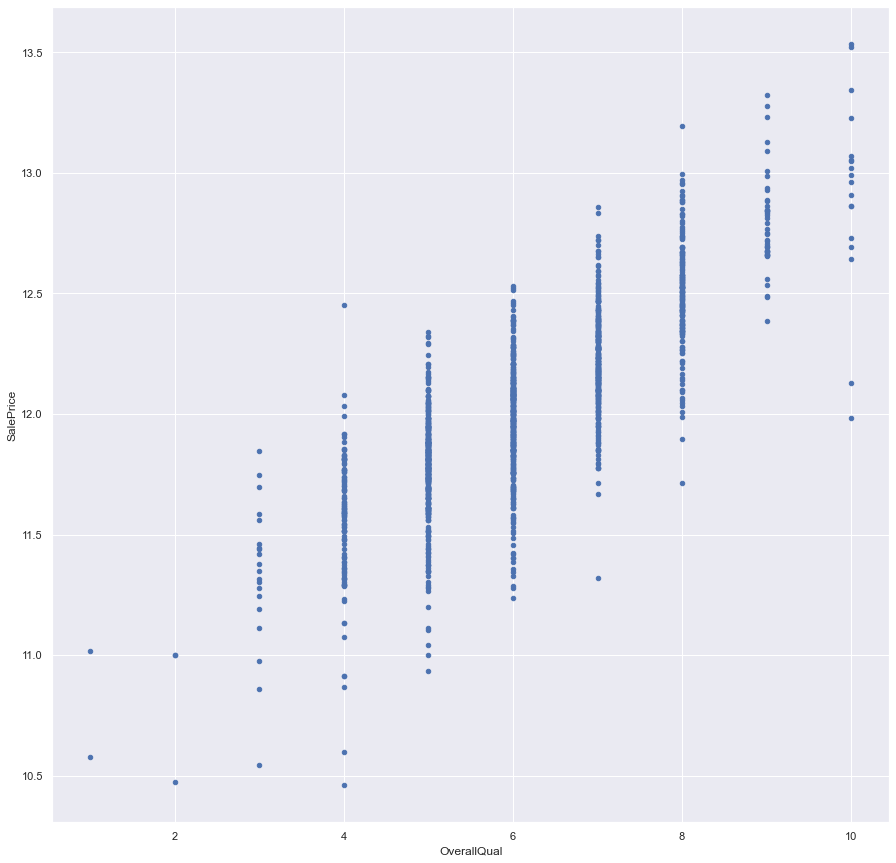

In [103]:
ax1 = train.plot.scatter(x='OverallQual', y='SalePrice')

##### Deleting a few outliers under the GarageArea

In [104]:
train.drop(train.loc[train['GarageArea']>=1230].index, inplace=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


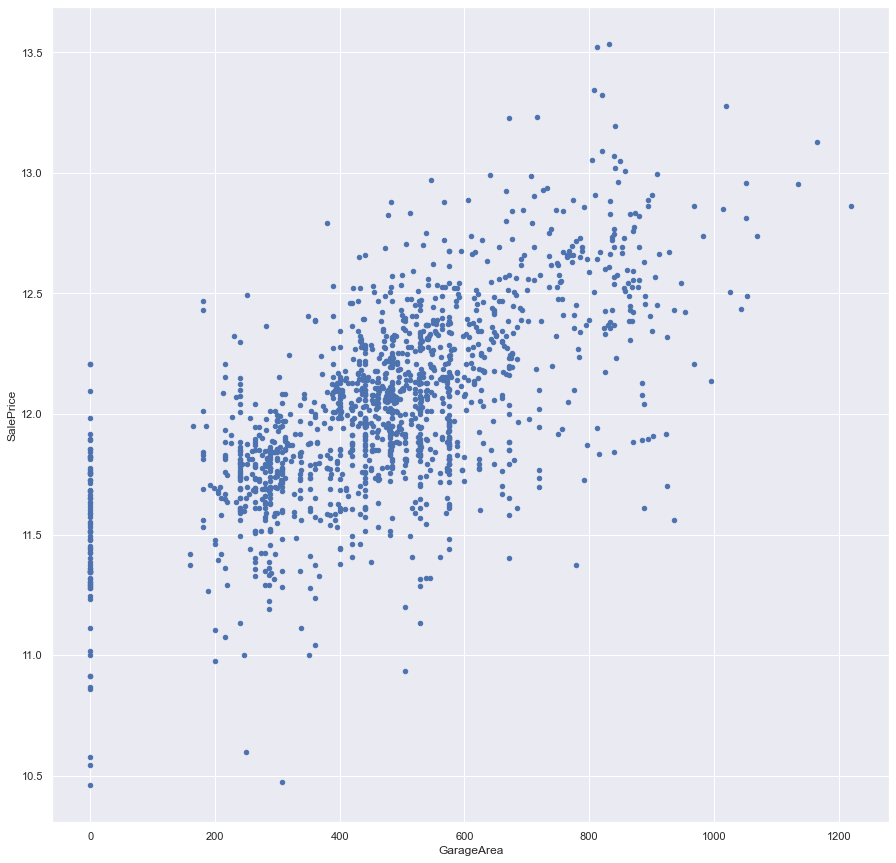

In [105]:
ax2 = train.plot.scatter(x='GarageArea', y='SalePrice')

##### Checking for Null Values

In [106]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:5])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

             Null Count
Feature                
PoolQC             1450
MiscFeature        1403
Alley              1365
Fence              1175
FireplaceQu         689


##### Dropping/filling null values

In [107]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()
print(sum(data.isnull().sum() != 0))

0


##### No more nulls

In [108]:
nulls = pd.DataFrame(data.isnull().sum().sort_values(ascending=False)[:5])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

              Null Count
Feature                 
Id                     0
WoodDeckSF             0
BedroomAbvGr           0
KitchenAbvGr           0
TotRmsAbvGrd           0


##### Setting the features and targets and running train test split

In [109]:
X = data['OverallQual'] 
y = data['SalePrice']

X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

In [110]:
X_train_s, X_test_s,y_train_s, y_test_s = train_test_split(X,y,random_state=0,test_size=.2)

lr1 = linear_model.LinearRegression()
model_simple = lr1.fit(X_train_s,y_train_s)

y_pred_simple = model_simple.predict(X_test_s)


##### Graphing the regression line

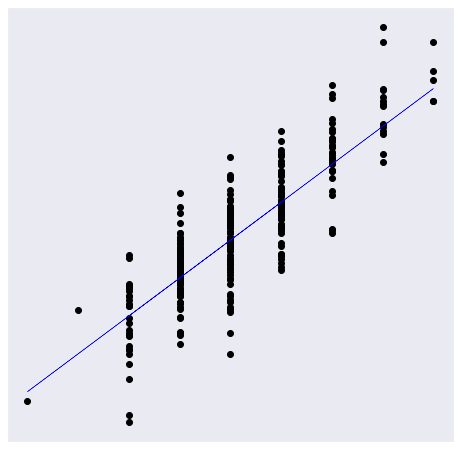

In [111]:
# Plot outputs
plt.figure(figsize=(8,8))
plt.scatter(X_test_s, y_test_s, color="black")
plt.plot(X_test_s, y_pred_simple, color="blue", linewidth=0.5)

plt.xticks(())
plt.yticks(())


plt.show()

##### Setting the feature columns using 5 features this time and running train test split

In [112]:
X = data[['OverallQual', 'GrLivArea','GarageCars','GarageArea','TotalBsmtSF']]
y = data['SalePrice'] 

In [113]:
X

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF
0,7,1710,2,548,856
1,6,1262,2,460,1262
2,7,1786,2,608,920
3,7,1717,3,642,756
4,8,2198,3,836,1145
...,...,...,...,...,...
1455,6,1647,2,460,953
1456,6,2073,2,500,1542
1457,7,2340,1,252,1152
1458,5,1078,1,240,1078


In [114]:
X.shape

(1456, 5)

In [115]:
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1456, dtype: float64

In [116]:
y.shape

(1456,)

In [117]:
X_train_m, X_test_m,y_train_m, y_test_m = train_test_split(X,y,random_state=0,test_size=.2)

lr2 = linear_model.LinearRegression()
model_multi = lr2.fit(X_train_m,y_train_m)

y_pred_multi = model_multi.predict(X_test_m)

##### Calculating the scores of the simple linear model and the multi linear model

In [118]:
print('score_simple:', model_simple.score(X_test_s,y_test_s))
print('score_multi:', model_multi.score(X_test_m,y_test_m))

score_simple: 0.7235509974309711
score_multi: 0.8649862979577254


In [119]:
print('mse_simple:',mean_squared_error(y_test_s,y_pred_simple))
print('mse_multi:',mean_squared_error(y_test_m,y_pred_multi))

mse_simple: 0.04691463324610289
mse_multi: 0.022912429618661065


In [120]:
print('rmse_simple:',mean_squared_error(y_test_s,y_pred_simple, squared = False))
print('rmse_multi:',mean_squared_error(y_test_m,y_pred_multi, squared = False))

rmse_simple: 0.2165978606683429
rmse_multi: 0.15136852254898


In [121]:
print('mae_simple:',mean_absolute_error(y_test_s,y_pred_simple))
print('mae_multi:',mean_absolute_error(y_test_m,y_pred_multi))

mae_simple: 0.1674090087441477
mae_multi: 0.11651925672932993


In [122]:
print('r2_simple:',r2_score(y_test_s,y_pred_simple))
print('r2_multi:',r2_score(y_test_m,y_pred_multi))

r2_simple: 0.7235509974309711
r2_multi: 0.8649862979577254


##### Setting up another test with standard scaler

In [123]:
X = data.drop('SalePrice', axis = 1)
y = np.log(data.SalePrice) 

In [124]:
X = StandardScaler().fit_transform(X)

##### Setting up PCA method

In [125]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PCA_1', 'PCA_2'])

In [126]:
X_train_PCA, X_test_PCA,y_train_PCA, y_test_PCA = train_test_split(X,y,random_state=0,test_size=.2)

In [127]:
lr3 = linear_model.LinearRegression()
model_PCA = lr3.fit(X_train_PCA,y_train_PCA)

y_pred_PCA = model_PCA.predict(X_test_PCA)

##### Calculating model scores after using PCA method

In [128]:
print('score_simple:', model_simple.score(X_test_s,y_test_s))
print('mse_simple:',mean_squared_error(y_test_s,y_pred_simple))
print('rmse_simple:',mean_squared_error(y_test_s,y_pred_simple, squared = False))
print('mae_simple:',mean_absolute_error(y_test_s,y_pred_simple))
print('r2_simple:',r2_score(y_test_s,y_pred_simple))

score_simple: 0.7235509974309711
mse_simple: 0.04691463324610289
rmse_simple: 0.2165978606683429
mae_simple: 0.1674090087441477
r2_simple: 0.7235509974309711


In [129]:
print('score_multi:', model_multi.score(X_test_m,y_test_m))
print('mse_multi:',mean_squared_error(y_test_m,y_pred_multi))
print('rmse_multi:',mean_squared_error(y_test_m,y_pred_multi, squared = False))
print('mae_multi:',mean_absolute_error(y_test_m,y_pred_multi))
print('r2_multi:',r2_score(y_test_m,y_pred_multi))

score_multi: 0.8649862979577254
mse_multi: 0.022912429618661065
rmse_multi: 0.15136852254898
mae_multi: 0.11651925672932993
r2_multi: 0.8649862979577254


In [130]:
print('score_PCA:', model_PCA.score(X_test_PCA,y_test_PCA))
print('mse_PCA:',mean_squared_error(y_test_PCA,y_pred_PCA))
print('rmse_PCA:',mean_squared_error(y_test_PCA,y_pred_PCA, squared = False))
print('mae_PCA:',mean_absolute_error(y_test_PCA,y_pred_PCA))
print('r2_PCA:',r2_score(y_test_PCA,y_pred_PCA))

score_PCA: 0.9156456939387201
mse_PCA: 9.786441828962521e-05
rmse_PCA: 0.00989264465598685
mae_PCA: 0.007461278312875494
r2_PCA: 0.9156456939387201


# Q2

##### Importing credit card data and dropping the Customer ID column

In [131]:
credit_df = pd.read_csv('credit card.csv')
credit_df.drop('CUST_ID', axis = 1, inplace = True)

credit_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


##### Checking for Null Values

In [132]:
nulls = pd.DataFrame(credit_df.isnull().sum().sort_values(ascending=False)[:5])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

                        Null Count
Feature                           
MINIMUM_PAYMENTS               313
CREDIT_LIMIT                     1
BALANCE                          0
CASH_ADVANCE_FREQUENCY           0
PRC_FULL_PAYMENT                 0


##### Filling null values with the mean

In [133]:
column_means = credit_df.mean(numeric_only=True)
credit_df = credit_df.fillna(column_means)

In [134]:
nulls = pd.DataFrame(credit_df.isnull().sum().sort_values(ascending=False)[:5])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

                        Null Count
Feature                           
BALANCE                          0
CASH_ADVANCE_FREQUENCY           0
PRC_FULL_PAYMENT                 0
MINIMUM_PAYMENTS                 0
PAYMENTS                         0


##### Calculating the sum of squared distance for various clusters

In [135]:
wcss=[]

for i in range(1,18):
    kmeans = KMeans(i)
    kmeans.fit(credit_df)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)


##### Plotting the graph and using elbow method to figure out good value for k means

Text(0, 0.5, 'WCSS')

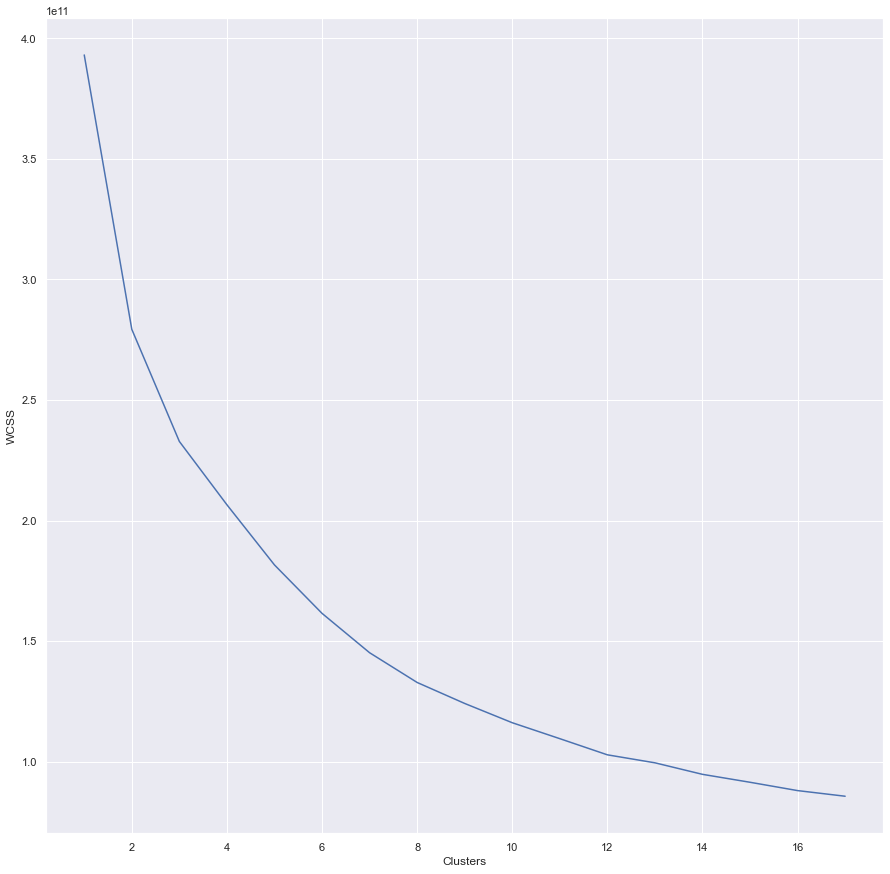

In [136]:
clusters = range(1,18)
plt.plot(clusters,wcss)
plt.xlabel("Clusters")
plt.ylabel("WCSS")

##### Setting the amount of clusters

In [137]:
nclusters = 2
km = KMeans(n_clusters=nclusters, random_state=0) 
km.fit(credit_df) 

KMeans(n_clusters=2, random_state=0)

In [138]:
y_cluster_kmeans = km.predict(credit_df)
score = metrics.silhouette_score(credit_df, y_cluster_kmeans)

##### Verifying the elbow method with silhouette score

In [139]:
for i in range(2,18):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(credit_df).labels_
    print ("k = "+str(i)+" is "
           +str(metrics.silhouette_score(credit_df,labels,metric="euclidean",sample_size=1000,random_state=200)))

k = 2 is 0.5128066305677381
k = 3 is 0.45913031286895445
k = 4 is 0.38102444549500764
k = 5 is 0.3766624921843038
k = 6 is 0.37800822183700056
k = 7 is 0.3531402241100118
k = 8 is 0.35959487533502044
k = 9 is 0.3405452070757967
k = 10 is 0.3509244508886415
k = 11 is 0.35261193014004893
k = 12 is 0.36101189968816144
k = 13 is 0.2995049646494924
k = 14 is 0.28224987602583906
k = 15 is 0.283343275213908
k = 16 is 0.256114568226038
k = 17 is 0.281301101242947


##### Adding the cluster as another column to the dataset

In [140]:
credit_df['Clusters'] = km.labels_

##### Printing the graph and visuailze the clusters

<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

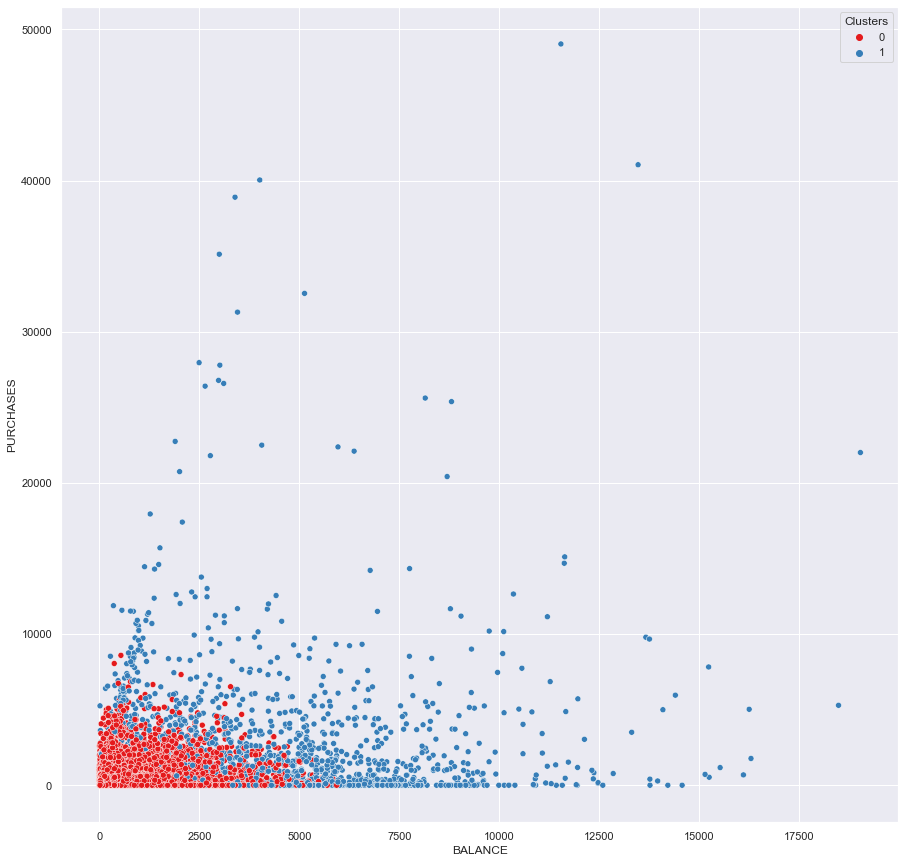

In [141]:
sns.set(rc={'figure.figsize':(15,15)})
sns.scatterplot(x = credit_df['BALANCE'],y = credit_df['PURCHASES'],hue=credit_df['Clusters'],palette='Set1')


##### Attempting another try using standard scaler

In [142]:
credit_df.drop('Clusters', axis = 1, inplace = True)

scaler = preprocessing.StandardScaler() 
scaler.fit(credit_df) 
X_scaled_array = scaler.transform(credit_df)
credit_df_scaled = pd.DataFrame(X_scaled_array, columns = credit_df.columns)

In [143]:
credit_df_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.486217,-3.498541e-01,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.503396,4.878305e-17,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960433,-0.570615,-3.354655e-01,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097856,-0.580536,-3.469065e-01,0.329200,-4.122768


##### Recalculate the sum of sqaured distance scores

In [144]:
wcss_scaled=[]

for i in range(1,18):
    kmeans = KMeans(i)
    kmeans.fit(credit_df_scaled)
    wcss_iter = kmeans.inertia_
    wcss_scaled.append(wcss_iter)

KeyboardInterrupt: 

Text(0, 0.5, 'WCSS')

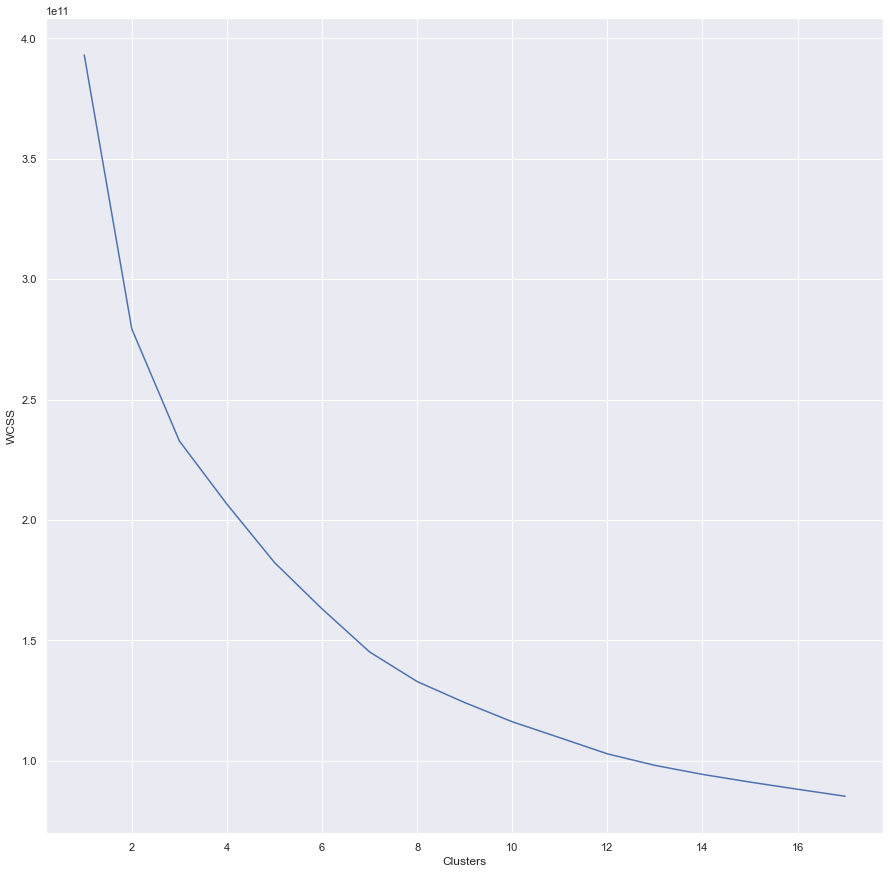

In [ ]:
clusters = range(1,18)
plt.plot(clusters,wcss)
plt.xlabel("Clusters")
plt.ylabel("WCSS")

##### Set the amount of clusters

In [ ]:
nclusters_scaled = 3
km_scaled = KMeans(n_clusters=nclusters_scaled, random_state=0) 
km_scaled.fit(credit_df_scaled) 

KMeans(n_clusters=3, random_state=0)

In [ ]:
y_cluster_kmeans_scaled = km_scaled.predict(credit_df_scaled)
score_scaled = metrics.silhouette_score(credit_df_scaled, y_cluster_kmeans_scaled)

##### Verify with silhouette score

In [ ]:
for i in range(2,18):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(credit_df_scaled).labels_
    print ("k = "+str(i)+" is "
           +str(metrics.silhouette_score(credit_df_scaled,labels,metric="euclidean",sample_size=1000,random_state=200)))

k = 2 is 0.2207297619903141
k = 3 is 0.2550341055038475
k = 4 is 0.20709423340906297
k = 5 is 0.20870492276672542
k = 6 is 0.21255075340318852
k = 7 is 0.21430087673617573
k = 8 is 0.22586953077752203
k = 9 is 0.22276677166382547
k = 10 is 0.22881420529158264
k = 11 is 0.22356794921361273
k = 12 is 0.22038045034012277
k = 13 is 0.2254666863594262
k = 14 is 0.19315944748029146
k = 15 is 0.22291098059295808
k = 16 is 0.18375754337802813
k = 17 is 0.19079546796301838


##### Adding the cluster columns and print the graph

In [ ]:
credit_df_scaled['Clusters'] = km_scaled.labels_

<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

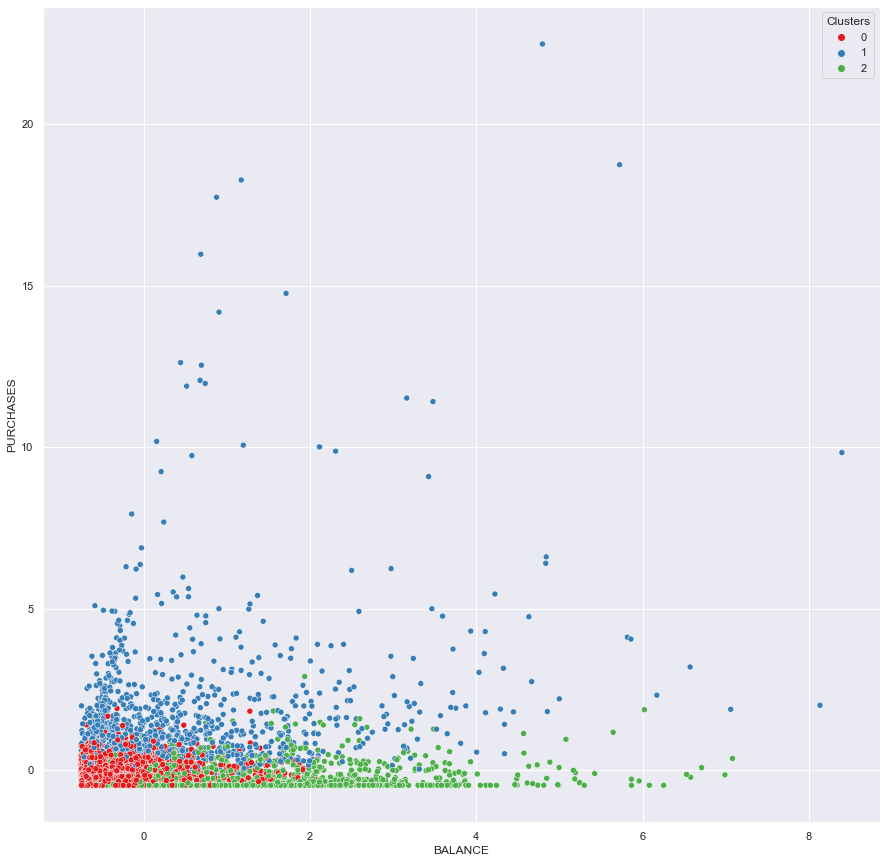

In [ ]:
sns.scatterplot(x = credit_df_scaled['BALANCE'],y = credit_df_scaled['PURCHASES'],hue=credit_df_scaled['Clusters'],palette='Set1')

##### One more try using PCA method

In [ ]:
credit_df_PCA = StandardScaler().fit_transform(credit_df)

In [ ]:
pca = PCA(n_components=2)   
prinComp = pca.fit_transform(credit_df_PCA)
princeDf = pd.DataFrame(data = prinComp,columns=['PCA_1','PCA_2'])

##### Calculate clusters again

In [ ]:
wcss_PCA=[]

for i in range(1,18):
    kmeans_PCA = KMeans(i)
    kmeans_PCA.fit(princeDf)
    wcss_iter = kmeans.inertia_
    wcss_PCA.append(wcss_iter)

Text(0, 0.5, 'WCSS')

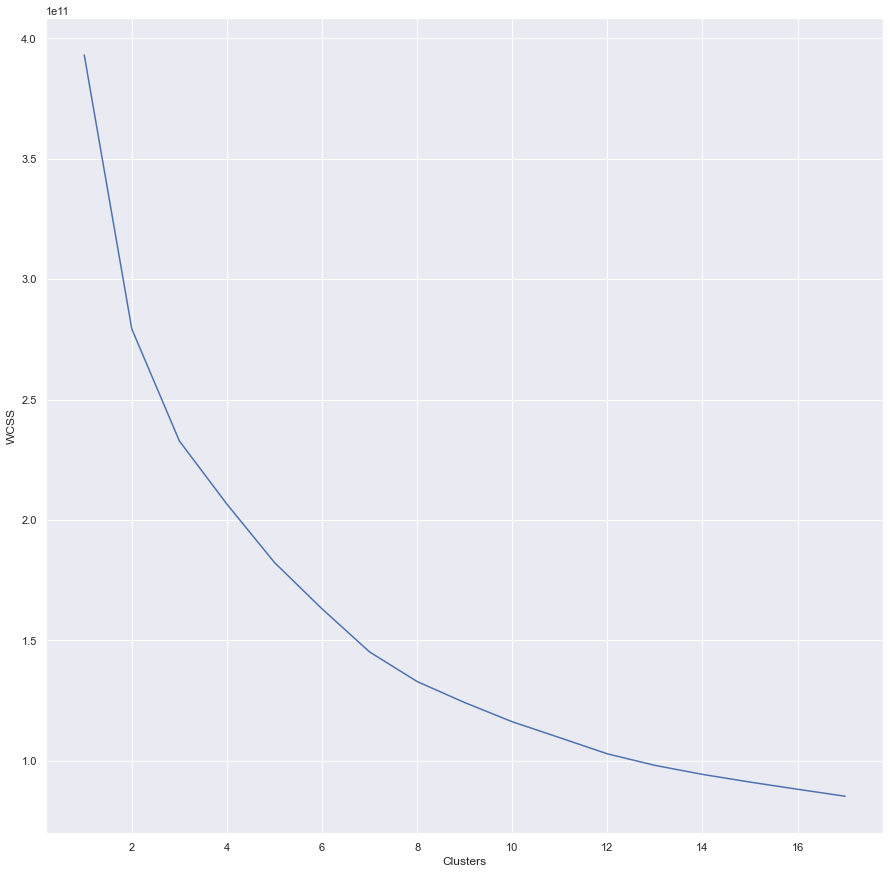

In [ ]:
clusters = range(1,18)
plt.plot(clusters,wcss)
plt.xlabel("Clusters")
plt.ylabel("WCSS")

##### Set clusters

In [ ]:
nclusters_PCA = 2
km_PCA = KMeans(n_clusters=nclusters_PCA, random_state=0) 
km_PCA.fit(princeDf) 

KMeans(n_clusters=2, random_state=0)

In [ ]:
y_cluster_kmeans_PCA = km_PCA.predict(princeDf)
score_PCA = metrics.silhouette_score(princeDf, y_cluster_kmeans_PCA)
score_PCA

0.4647554203198954

##### Verify

In [ ]:
for i in range(2,18):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(princeDf).labels_
    print ("k = "+str(i)+" is "
           +str(metrics.silhouette_score(princeDf,labels,metric="euclidean",sample_size=1000,random_state=200)))

k = 2 is 0.46656358405555637
k = 3 is 0.4432257872393676
k = 4 is 0.41459282947655374
k = 5 is 0.4101211960664973
k = 6 is 0.37335799067967923
k = 7 is 0.37094244264417314
k = 8 is 0.382044440562333
k = 9 is 0.3714460827784769
k = 10 is 0.3672866856169601
k = 11 is 0.37435515657529145
k = 12 is 0.3742593231476211


KeyboardInterrupt: 

##### Add label and print graph

In [ ]:
princeDf['Clusters'] = km_PCA.labels_

<AxesSubplot:xlabel='PCA_1', ylabel='PCA_2'>

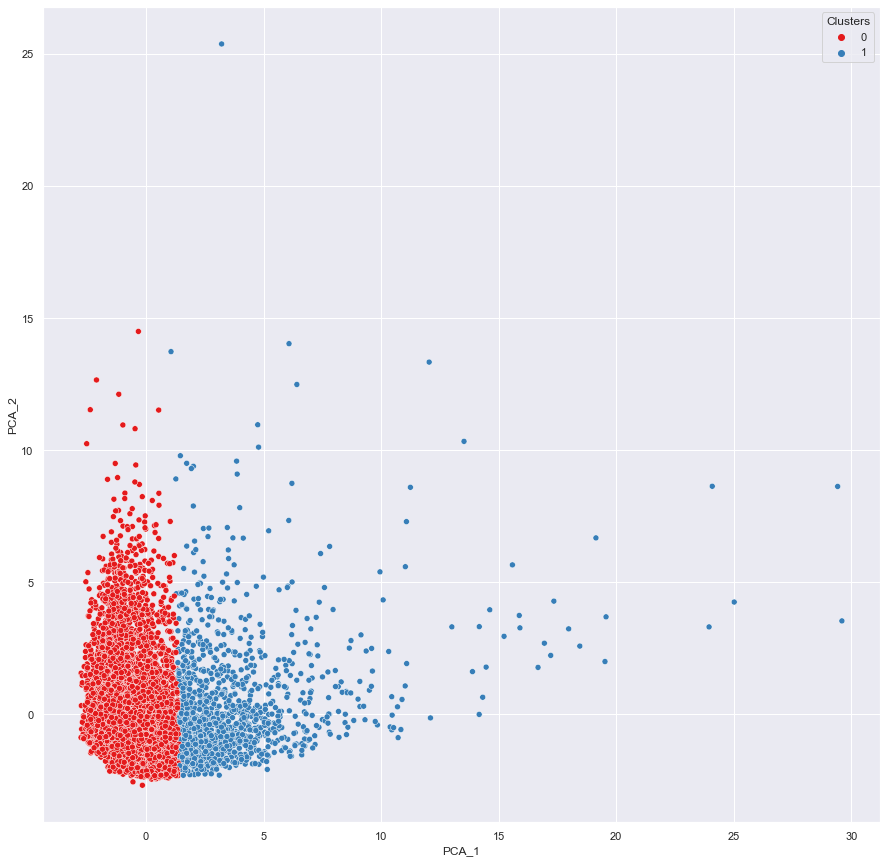

In [ ]:
sns.scatterplot(x = princeDf['PCA_1'],y = princeDf['PCA_2'],hue=princeDf['Clusters'],palette='Set1')